In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [8]:
training_data = pd.read_csv('data/unimelb_training.csv', low_memory=False)

In [10]:
training_data.dtypes

Grant.Application.ID                         int64
Grant.Status                                 int64
Sponsor.Code                                object
Grant.Category.Code                         object
Contract.Value.Band...see.note.A            object
Start.date                                  object
RFCD.Code.1                                float64
RFCD.Percentage.1                          float64
RFCD.Code.2                                float64
RFCD.Percentage.2                          float64
RFCD.Code.3                                float64
RFCD.Percentage.3                          float64
RFCD.Code.4                                float64
RFCD.Percentage.4                          float64
RFCD.Code.5                                float64
RFCD.Percentage.5                          float64
SEO.Code.1                                 float64
SEO.Percentage.1                           float64
SEO.Code.2                                 float64
SEO.Percentage.2               

In [12]:
training_data.head()

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,...,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
0,1,1,NaN,NaN,A,8/11/05,280199.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2B,10A,B,11/11/05,280103.0,30.0,280106.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,29A,10B,A,14/11/05,321004.0,60.0,321216.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,40D,10B,C,15/11/05,270602.0,50.0,320602.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,59C,10A,A,16/11/05,260500.0,34.0,280000.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
pd.isna(training_data).sum()

Grant.Application.ID                          0
Grant.Status                                  0
Sponsor.Code                                912
Grant.Category.Code                         912
Contract.Value.Band...see.note.A           3563
Start.date                                    0
RFCD.Code.1                                 634
RFCD.Percentage.1                           634
RFCD.Code.2                                 634
RFCD.Percentage.2                           634
RFCD.Code.3                                 634
RFCD.Percentage.3                           634
RFCD.Code.4                                 634
RFCD.Percentage.4                           634
RFCD.Code.5                                 634
RFCD.Percentage.5                           634
SEO.Code.1                                  664
SEO.Percentage.1                            664
SEO.Code.2                                  664
SEO.Percentage.2                            664
SEO.Code.3                              

In [15]:
pd.isna(training_data)

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,...,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
0,False,False,True,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
5,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
6,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
7,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
8,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
9,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [16]:
training_data.corr()

,Grant.Application.ID,Grant.Status,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,...,Dept.No..15,Faculty.No..15,With.PHD.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
Grant.Application.ID,1.000000,-0.118442,-0.007292,0.138403,-0.146367,-0.146068,-0.072131,-0.085399,0.039818,0.041116,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Grant.Status,-0.118442,1.000000,-0.016544,0.005530,-0.013917,0.009102,-0.036839,-0.023461,-0.005223,-0.009837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFCD.Code.1,-0.007292,-0.016544,1.000000,0.053996,0.068443,-0.053034,0.059289,-0.026738,-0.022153,-0.026819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFCD.Percentage.1,0.138403,0.005530,0.053996,1.000000,-0.899336,-0.889829,-0.704149,-0.728493,-0.240308,-0.239617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFCD.Code.2,-0.146367,-0.013917,0.068443,-0.899336,1.000000,0.875169,0.640219,0.563266,0.137284,0.125676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFCD.Percentage.2,-0.146068,0.009102,-0.053034,-0.889829,0.875169,1.000000,0.396666,0.366207,0.045368,0.038482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFCD.Code.3,-0.072131,-0.036839,0.059289,-0.704149,0.640219,0.396666,1.000000,0.884559,0.215813,0.195219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFCD.Percentage.3,-0.085399,-0.023461,-0.026738,-0.728493,0.563266,0.366207,0.884559,1.000000,0.177289,0.172003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFCD.Code.4,0.039818,-0.005223,-0.022153,-0.240308,0.137284,0.045368,0.215813,0.177289,1.000000,0.907529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFCD.Percentage.4,0.041116,-0.009837,-0.026819,-0.239617,0.125676,0.038482,0.195219,0.172003,0.907529,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
def show_corr(dataframe):
    corr = dataframe.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

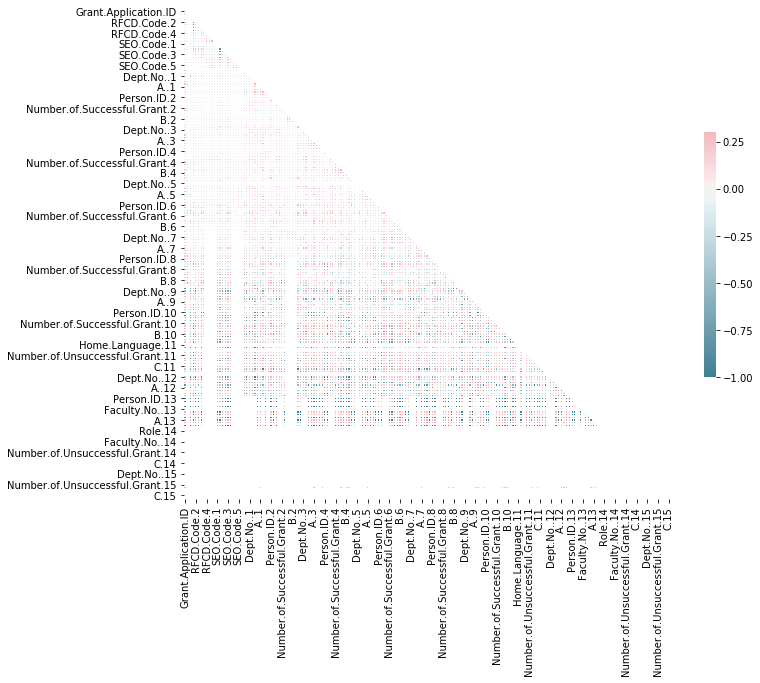

In [44]:
show_corr(training_data)

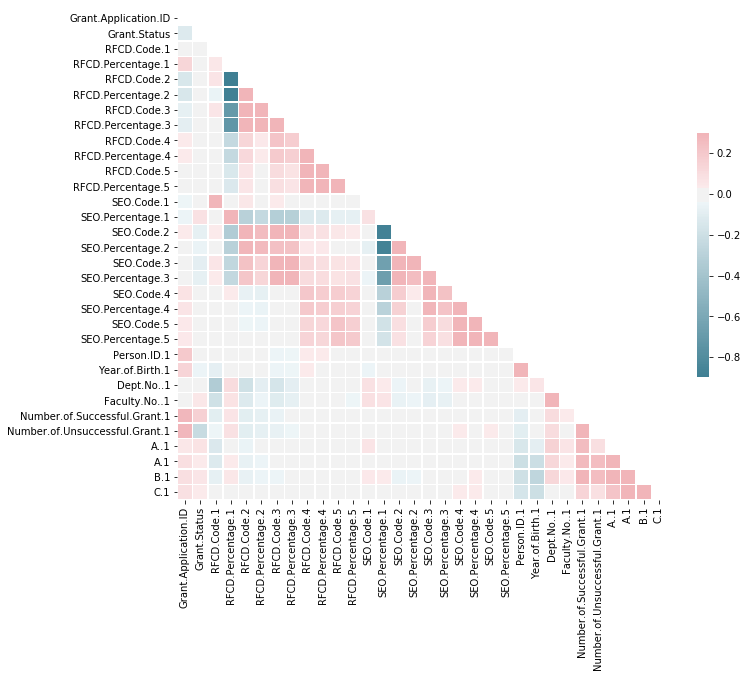

In [47]:
naive_drop_tr_d = training_data.dropna(axis=1, thresh=training_data.shape[0]//2)
naive_drop_tr_d.shape[0]
show_corr(naive_drop_tr_d)

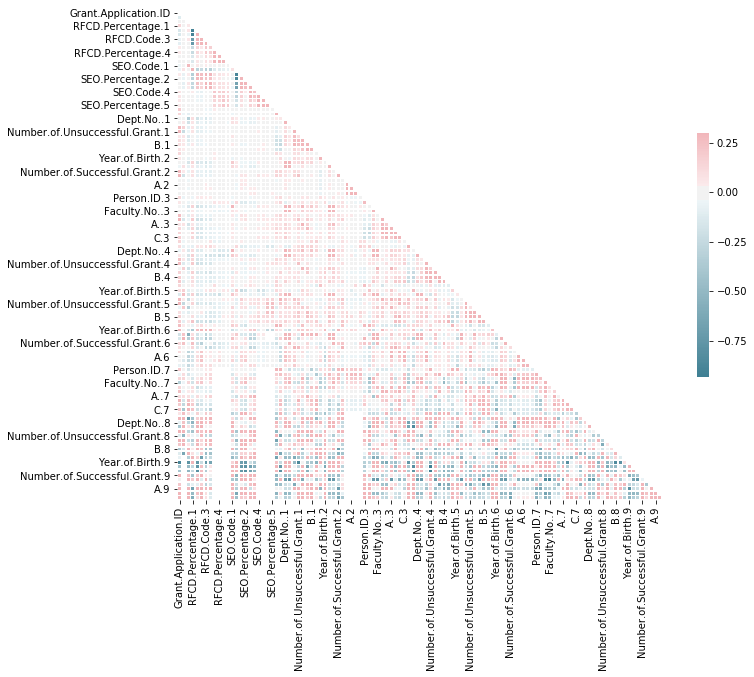

In [46]:
tr_d = training_data
tr_d_1000 = tr_d.dropna(axis=1, thresh=tr_d.shape[0]//1000)
show_corr(tr_d_1000)